Using RandomWavesFast class
====================================================

In this notebook, we describe how we can generate random waves in an optimised manner using the RandomWavesFast. We load the RandomWaves and RandomWavesFast classes for generating the same wave time seriesand we compare computational times.  

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import numpy as np
import sys
#Append path of local proteus installation
sys.path.append("D:/Work/My repos/proteus/")
sys.path.append("D:/Work/My repos/proteus/proteus")

#The notebook will work with the following commit:
#https://github.com/erdc-cm/proteus/commit/9bb34b3563b5ddab6cb1dd9f75173da2710d2a41
import imp
WT = imp.load_source('WaveTools', 'D:/Work/My repos/proteus/proteus/WaveTools.py')
import time 
#from proteus import WaveTools as WT

Tp = 2.
Hs = 0.05
mwl = 1.
depth = 1.
g = np.array([0., -9.81, 0])
N = 500
bandFactor = 2.
spectName = "JONSWAP"
spectral_params = None
waveDir = np.array([1., 0., 0.])

phi = 2.0*3.14159*np.random.random(N)


Calling RandomWaves and RandomWavesFast class to generate the free surface elevation and velocities

In [5]:
%tb


RW = WT.RandomWaves(Tp,
                 Hs,
                 mwl,
                 depth,
                 waveDir,
                 g,
                 N,
                 bandFactor,
                 spectName,
                 spectral_params,
                 phi
                )
nperiod = 80
npoints = 25
n = npoints * nperiod
tnlist=np.linspace(0,nperiod*Tp,n)
xlist=np.zeros((25,3),)
xlist[:,0]=np.linspace(0,5,25)
Lgen =np.array([0,0.,0.])



RW_Fast = WT.RandomWavesFast(tnlist[0],
                            tnlist[-1],
                            xlist[0],
                            Tp,
                            Hs,
                            mwl,#m significant wave height
                            depth , #m depth
                            waveDir,
                            g, #peak frequency
                            N,
                            bandFactor, #accelerationof gravity
                            spectName ,# random words will result in error and return the available spectra
                            spectral_params, #JONPARAMS = {"gamma": 3.3, "TMA":True,"depth": depth}
                            phi,
                            Lgen = Lgen,
                            Nfreq = 16,
                            Nwaves = 8,
                            checkAcc = False)


NameError: name 'WT' is not defined

In [33]:
wind = RW_Fast.windOut()
print wind

x = xlist[0]

series = RW.writeEtaSeries(tnlist[0],tnlist[-1],x,"test.txt",4.*Lgen)

tnlist = series[:,0] 
eta_t = np.zeros(len(tnlist),)


t1  =-time.clock()
for i in range(len(tnlist)):
    t = tnlist[i]
    eta_t[i] = RW.eta(x, t)
t1 = t1 + time.clock()

eta_ts = eta_t.copy()

#Calculating time series
t2 = -time.clock()
for i in range(len(tnlist)):
    t = tnlist[i]
    eta_ts[i] = RW_Fast.eta(x, t)
t2 = t2 +  time.clock()




{'Tlag': 0.0, 'TOverlap': 10.275229357798162, 'TWindow': 14.678899082568805}


Next, we compare the two generated time series in terms of data and execution time

0.0143207948078
25.257726254


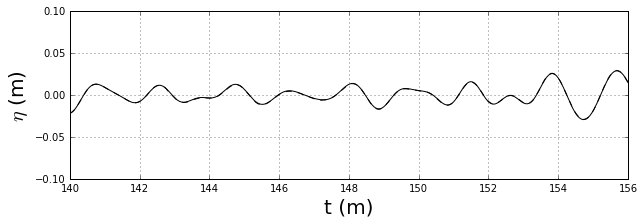

In [34]:
#Plotting both time series from time series file and wave class
ii = np.where(tnlist>0)[0][0]
jj=np.where(tnlist>150)[0][0]

psize = 20
import time, sys
from IPython.display import clear_output

print(max(eta_t[ii:jj]-eta_ts[ii:jj]))/Hs

plt.figure(0, figsize=(10,3), dpi=300)
plt.grid()
plt.plot(tnlist, eta_t[:], color='black', label="RandomWaves")
plt.plot(tnlist, eta_ts[:], "k--", label="RandomWavesFast")
plt.ylim(-0.1,0.1)
plt.xlabel("t (m)", fontsize = psize)
plt.ylabel("$\eta$ (m)",fontsize = psize)
dur = series[-1,0]-series[0,0]
cut =2*Tp

plt.xlim(140,series[-1,0]-cut)   
    
print t1/t2

In [ ]:
a
a
a
a
a

a
a
a
a
a
a

a
a
a
a

a
a
a
a
a